In [1]:
import pandas as pd # for data manipulation
import matplotlib.pylab as plt  # for data visualization

In [2]:
data = pd.read_excel('C:\\Users\\Karuna Singh\\Study Material\\Datasets_360\\Telco_customer_churn.xlsx') # loading the dataset

In [3]:
data.info() # checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [4]:
data.isna().sum() # checking null values

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [5]:
data.head() # Checking the data

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [6]:
data.duplicated().sum() # Checking count of values in each attribute for One Hot Encoding

0

In [7]:
data.describe() # checking statistical dimensions of the data

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
df = data.iloc[:,3:]

In [9]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
# Applying normalization to the designated columns
df_norm = norm_func(df.iloc[:,[1,2,5,9,21,22,23,24,25,26]])

In [11]:
# Create dummy variables for all the categorical variables
df_dummy=pd.get_dummies(df.iloc[:,[0,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20]], drop_first = True)

In [12]:
df1 = pd.concat((df_norm,df_dummy), axis = 1)

In [13]:
df1.head() # Checking data after applying normalization & calling dummies

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0.000000,0.000000,0.000000,0.094118,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,...,0,0,1,0,0,0,0,1,0,0
1,0.090909,0.098592,0.977195,0.200000,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,...,0,0,0,0,1,0,0,1,1,0
2,0.000000,0.239437,0.226645,0.611765,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,...,0,1,1,1,1,0,0,1,0,0
3,0.090909,0.338028,0.395279,0.141176,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680,...,0,1,1,0,1,0,0,1,0,0
4,0.090909,0.507042,0.126625,0.164706,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652,...,0,0,0,0,1,0,0,1,0,0


In [14]:
df1.describe().T # checking staistical dimensions after applying normalization and calling dummies and transposing for better visualization

,count,mean,std,min,25%,50%,75%,max
Number of Referrals,7043.0,0.177442,0.272836,0.0,0.000000,0.000000,0.272727,1.0
Tenure in Months,7043.0,0.442067,0.345663,0.0,0.112676,0.394366,0.760563,1.0
Avg Monthly Long Distance Charges,7043.0,0.459271,0.309024,0.0,0.184237,0.457892,0.728046,1.0
Avg Monthly GB Download,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
Monthly Charge,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0
Total Charges,7043.0,0.260972,0.261507,0.0,0.044005,0.158753,0.434780,1.0
Total Refunds,7043.0,0.039409,0.158719,0.0,0.000000,0.000000,0.000000,1.0
Total Extra Data Charges,7043.0,0.045738,0.167367,0.0,0.000000,0.000000,0.000000,1.0
Total Long Distance Charges,7043.0,0.210143,0.237511,0.0,0.019790,0.112615,0.334136,1.0
Total Revenue,7043.0,0.251967,0.239606,0.0,0.048859,0.174551,0.399715,1.0


In [15]:
import scipy.cluster.hierarchy as sch

In [16]:
z = sch.linkage(df1, method = "complete", metric = "euclidean") # columns 0,1 & 2 are not inluded as 0 & 2 are nominal and Column 1 has same data and doesnt impact the cluster formation

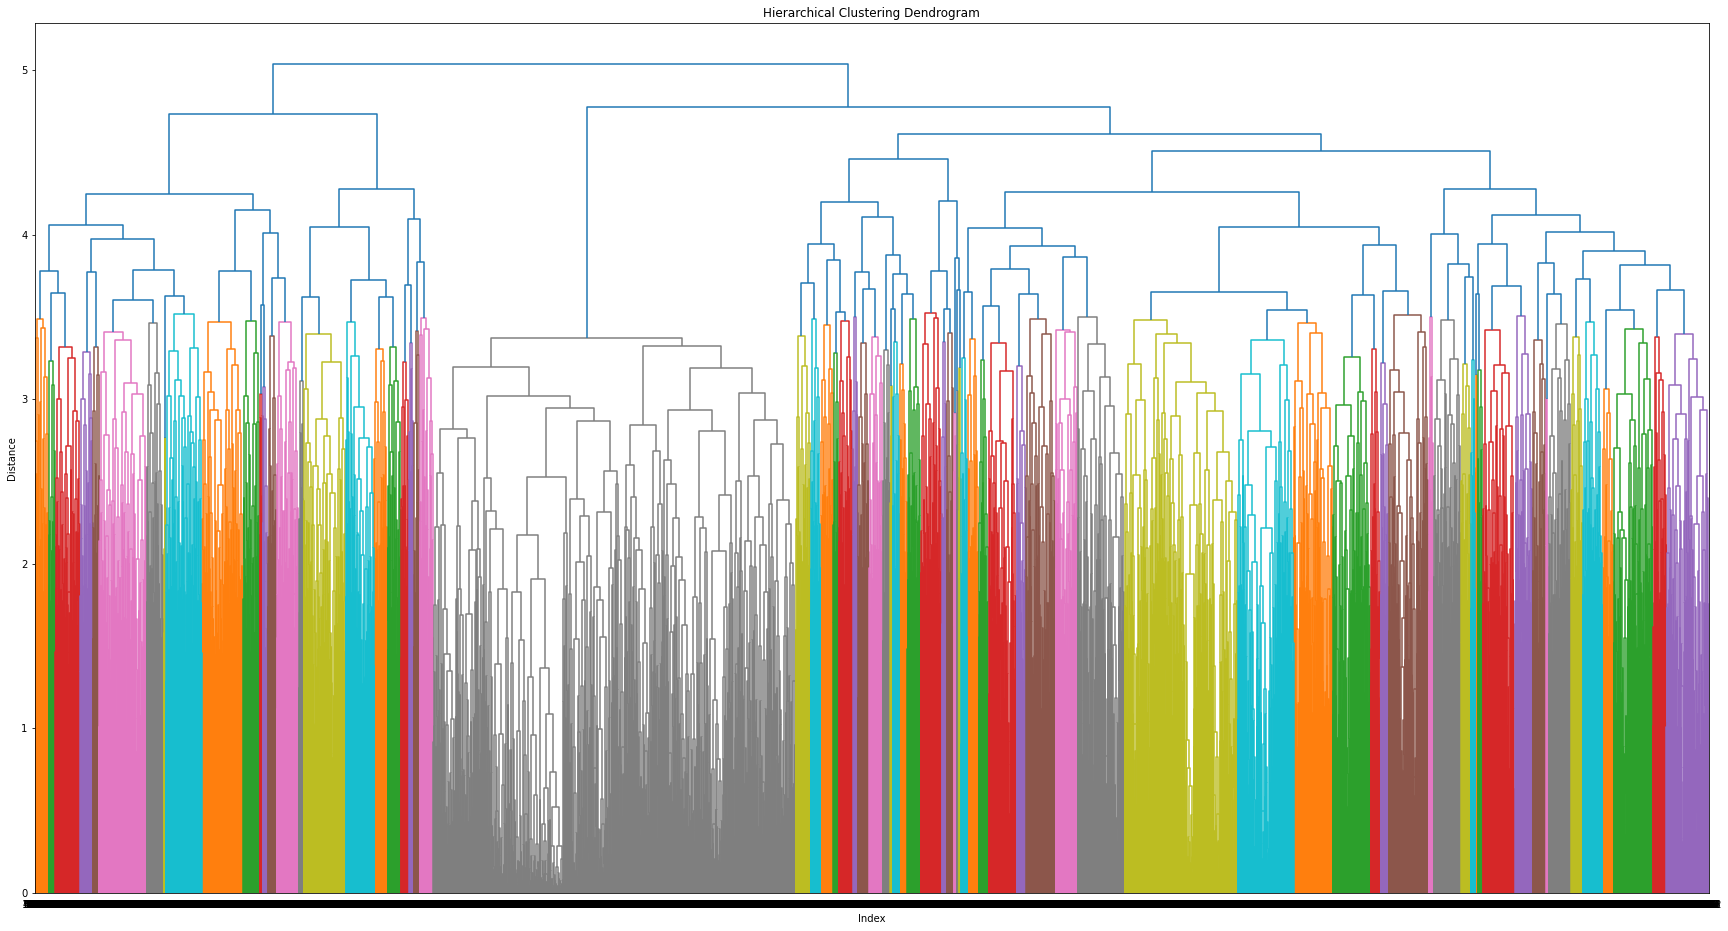

In [17]:
# Dendrogram
plt.figure(figsize=(30, 16));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [18]:
# calling Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [19]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the above dendrogram
h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = "euclidean").fit(df1.iloc[:,3:]) 
h_complete.labels_
cluster_labels = pd.Series(h_complete.labels_)

In [20]:
data['Clust'] = cluster_labels # creating a new column with the name "Clust"
data.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Clust
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,4
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,3
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,3
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,0


In [21]:
data_clust = data.pop("Clust") # extracting Clust column for inserting the 'Clust' column in the beginning to make interpretations easier
data.insert(0,"Clust",data_clust)

In [22]:
data.head() # Checking the data after rearranging the Clust column

,Clust,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,4,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,3,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,3,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,0,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [23]:
# Aggregate mean of each cluster and transposed for better visualisation
data.iloc[:,4:].groupby(data['Clust']).mean().T

Clust,0,1,2,3,4
Number of Referrals,3.308550,2.108392,2.174312,0.966769,1.275482
Tenure in Months,56.125774,35.615385,30.586501,19.406953,20.495868
Avg Monthly Long Distance Charges,24.725118,19.213718,24.973965,25.135680,16.558806
Avg Monthly GB Download,27.448575,28.520979,0.000000,24.183027,26.092746
Monthly Charge,92.567441,63.890268,21.079194,85.355036,48.460606
Total Charges,5242.220539,2360.038054,663.462936,1745.207388,1054.911433
Total Refunds,2.057503,2.535198,1.653945,2.153538,1.457668
Total Extra Data Charges,10.724907,10.512821,0.000000,6.952965,7.704316
Total Long Distance Charges,1373.628860,676.353543,770.231298,485.565552,324.534986
Total Revenue,6624.516803,3044.369219,1432.040288,2235.572367,1385.693067


In [24]:
data['Clust'].value_counts() # Checking the no.of Customers in each cluster

3    1956
0    1614
2    1526
4    1089
1     858
Name: Clust, dtype: int64

In [25]:
data_p = pd.DataFrame(data.iloc[:,4:].groupby(data['Clust']).mean()) # assigning mean values to a variable for Pie Chart visualization

In [26]:
data_pie=data_p['Total Revenue']
data_pie

Clust
0    6624.516803
1    3044.369219
2    1432.040288
3    2235.572367
4    1385.693067
Name: Total Revenue, dtype: float64

(-1.1194625193893, 1.1009267866375858, -1.103621534579286, 1.1262914231954708)

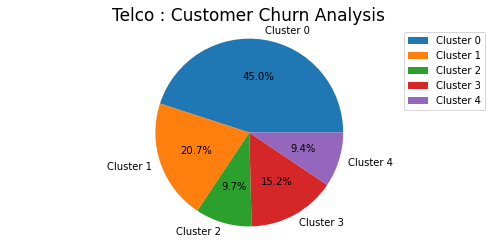

In [27]:
labels=['Cluster 0','Cluster 1','Cluster 2','Cluster 3', 'Cluster 4']
Total= data_p['Total Revenue']

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.pie(Total,labels=labels,autopct='%0.1f%%')
plt.title("Telco : Customer Churn Analysis", fontsize =17, loc = 'center')
plt.legend( loc="upper right")
plt.axis('equal')

In [28]:
data.to_csv("Customer_Churn_Telco_HClustering.csv", index=False, encoding='utf-8') # creating a csv file with cluster segmentation in csv format

In [29]:
import os # Checking the path of the csv file created
os.getcwd()

'C:\\Users\\Karuna Singh\\360 DigitMg'